#                                                             Netflix movie ratings prediction
** The Netflix Movie Ratings Prediction project is a machine learning project that aims to predict movie ratings based on various features such as genre, cast, and runtime. The project uses a dataset of movie ratings collected from Netflix and employs various machine learning algorithms to make predictions Recommendation system is the most profitable solution for the organization that offers its services to a number of users who have a number of options. As the name suggests, the system uses algorithms to recommend content (videos, ads, news, etc.) to an individual based on their usage**

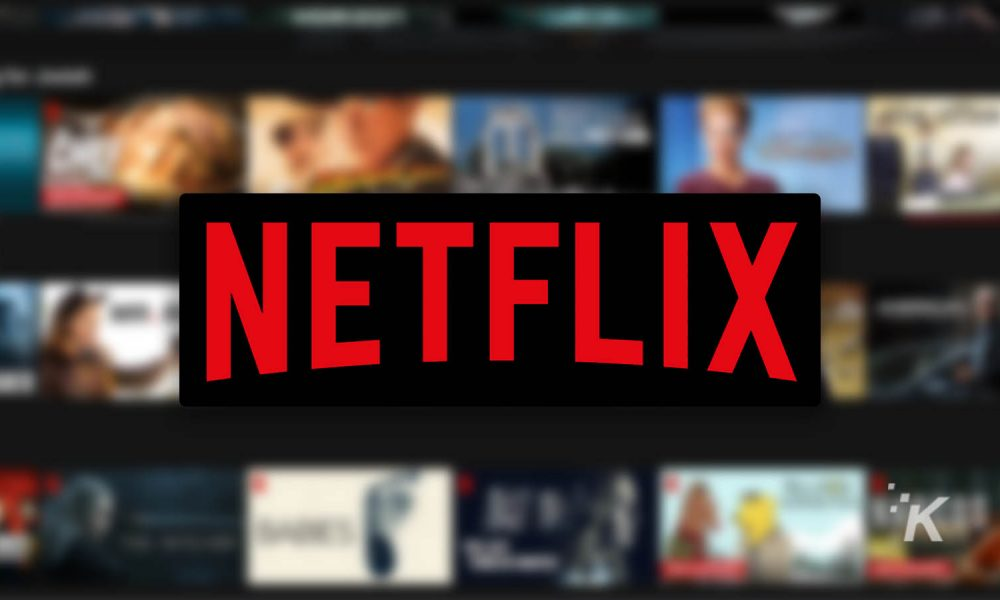

# Importing Libraries


In [268]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import collections
from datetime import datetime
import datetime as dt

# Ignore the DeprecationWarning warning
warnings.filterwarnings("ignore", category=DeprecationWarning)



# Loading the data


In [269]:
data = pd.read_csv(r"C:\Users\elham\Downloads\project data mining/Netflix Dataset.csv")
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploring the dataset

In [270]:
# To see the high level data details
print(data.shape)
print(data.columns)
print(data.info())

(7789, 11)
Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


# Data Cleaning

In [271]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

# Data Normalization

In [272]:
# Get the counts of each unique value in the column and sort by frequency
value_counts = data['Type'].value_counts().sort_values(ascending=False)

# Create a dictionary to map each unique value to a number based on its frequency rank
value_to_num = {value: num+1 for num, value in enumerate(value_counts.index)}

# Use the map() method to replace the values in the column with the corresponding numbers
data['Type'] = data['Type'].map(value_to_num)

In [273]:
# Get the counts of each unique value in the column and sort by frequency
value_counts = data['Country'].value_counts().sort_values(ascending=False)

# Create a dictionary to map each unique value to a number based on its frequency rank
value_to_num = {value: num+1 for num, value in enumerate(value_counts.index)}

# Use the map() method to replace the values in the column with the corresponding numbers
data['Country'] = data['Country'].map(value_to_num)

In [274]:
# Get the counts of each unique value in the column and sort by frequency
value_counts = data['Cast'].value_counts().sort_values(ascending=False)

# Create a dictionary to map each unique value to a number based on its frequency rank
value_to_num = {value: num+1 for num, value in enumerate(value_counts.index)}

# Use the map() method to replace the values in the column with the corresponding numbers
data['Cast'] = data['Cast'].map(value_to_num)

In [275]:
# Encode categorical columns
data['Category'] = data['Category'].map({'Movie': 1, 'TV Show': 0})

In [276]:
# Fill in missing Director values and encode
data['Director'].fillna('Unknown', inplace=True)
data['Director'] = data['Director'].replace('Unknown', 0)

In [277]:
# Get the counts of each unique value in the column and sort by frequency
value_counts = data['Director'].value_counts().sort_values(ascending=False)

# Create a dictionary to map each unique value to a number based on its frequency rank
value_to_num = {value: num+1 for num, value in enumerate(value_counts.index)}

# Use the map() method to replace the values in the column with the corresponding numbers
data['Director'] = data['Director'].map(value_to_num)
data['Director']

0          1
1       2068
2       4045
3       4007
4         77
        ... 
7784    3969
7785    3970
7786       1
7787       1
7788    4051
Name: Director, Length: 7789, dtype: int64

In [278]:
data['Director'] = data['Director'].replace(1, 0)

In [279]:
data['Director']

0          0
1       2068
2       4045
3       4007
4         77
        ... 
7784    3969
7785    3970
7786       0
7787       0
7788    4051
Name: Director, Length: 7789, dtype: int64

In [280]:
# Convert to datetime and extract Year 
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data['Year'] = data['Release_Date'].dt.year

In [281]:
# Split "duration" column into two columns
data[["duration_value", "duration_unit"]] = data["Duration"].str.split(" ", expand=True)
# Convert "duration_value" column to numeric type
data["duration_value"] = pd.to_numeric(data["duration_value"])
# normliza duration_value using max approach
# find the max num which the duratuin_unit is season
sea_row=data[data["duration_unit"]=="Season"]
sea_row["duration_value"].max() # =1
data["duration_value"]=1/(data["duration_value"])

In [282]:
data['Country'] = data['Country'].replace('NaN', 0)

In [283]:
data.drop(['Show_Id','Title','Release_Date','Duration','duration_unit'], axis=1, inplace=True)

In [284]:
# Drop Description
data.drop('Description', axis=1, inplace=True)

# Check final dataframe 
data

,Category,Director,Cast,Country,Rating,Type,Year,duration_value
0,0,0,4730.0,14.0,TV-MA,148,2020.0,0.250000
1,1,2068,3455.0,11.0,TV-MA,3,2016.0,0.010753
2,1,4045,160.0,31.0,R,37,2018.0,0.012821
3,1,4007,161.0,1.0,PG-13,208,2017.0,0.012500
4,1,77,152.0,1.0,PG-13,13,2020.0,0.008130
...,...,...,...,...,...,...,...,...
7784,1,3969,6662.0,681.0,TV-MA,3,2020.0,0.010101
7785,1,3970,6652.0,2.0,TV-14,41,2019.0,0.009009
7786,1,0,6663.0,NaN,TV-MA,55,2020.0,0.022727
7787,0,0,6831.0,12.0,TV-PG,54,2020.0,1.000000


In [285]:
data['Cast'].fillna('Unknown', inplace=True)
#data['Year'].fillna('Unknown', inplace=True)
data['Country'].fillna('Unknown', inplace=True)
data['Cast'] = data['Cast'].replace('Unknown',0)
#data['Year'] = data['Year'].replace('Unknown', 0)
data['Country'] = data['Country'].replace('Unknown',0)

In [286]:
data.dropna(subset=["Rating",], inplace=True)

In [287]:
#data['duration_value']=data['duration_value'].round(1)

In [288]:
data

,Category,Director,Cast,Country,Rating,Type,Year,duration_value
0,0,0,4730.0,14.0,TV-MA,148,2020.0,0.250000
1,1,2068,3455.0,11.0,TV-MA,3,2016.0,0.010753
2,1,4045,160.0,31.0,R,37,2018.0,0.012821
3,1,4007,161.0,1.0,PG-13,208,2017.0,0.012500
4,1,77,152.0,1.0,PG-13,13,2020.0,0.008130
...,...,...,...,...,...,...,...,...
7784,1,3969,6662.0,681.0,TV-MA,3,2020.0,0.010101
7785,1,3970,6652.0,2.0,TV-14,41,2019.0,0.009009
7786,1,0,6663.0,0.0,TV-MA,55,2020.0,0.022727
7787,0,0,6831.0,12.0,TV-PG,54,2020.0,1.000000


In [289]:
unique_values = data['Rating'].unique()
unique_values_string = ', '.join(str(x) for x in unique_values)
print(unique_values_string)

TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y, TV-Y7, PG, G, NC-17, TV-Y7-FV, UR


In [290]:
category_rating_map = {
    'TV-MA': 5,
    'R': 4,
    'PG-13': 3,
    'TV-14': 3,  
    'TV-G': 1,
    'TV-PG': 2,
    'NR': 1,
    'PG': 1,
    'G': 1,
    'TV-Y7': 2,
    'TV-Y': 1,
    'NC-17': 4,
    'TV-Y7-FV': 2,  
    'UR': 1
}
# find the maximum value in the dictionary
max_rating = max(category_rating_map.values())

# normalize the values in the dictionary by dividing each value by the maximum value
normalized_category_rating_map = {k: v/max_rating for k, v in category_rating_map.items()}

# print the normalized dictionary
print(normalized_category_rating_map)


{'TV-MA': 1.0, 'R': 0.8, 'PG-13': 0.6, 'TV-14': 0.6, 'TV-G': 0.2, 'TV-PG': 0.4, 'NR': 0.2, 'PG': 0.2, 'G': 0.2, 'TV-Y7': 0.4, 'TV-Y': 0.2, 'NC-17': 0.8, 'TV-Y7-FV': 0.4, 'UR': 0.2}


In [291]:
NewRating = [normalized_category_rating_map[Rate] for Rate in data["Rating"] if Rate in normalized_category_rating_map.keys()]
NewRating

[1.0,
 1.0,
 0.8,
 0.6,
 0.6,
 1.0,
 1.0,
 0.8,
 0.6,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.6,
 0.6,
 0.8,
 0.6,
 0.4,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.2,
 1.0,
 1.0,
 0.6,
 1.0,
 0.6,
 0.2,
 0.2,
 0.6,
 0.6,
 0.4,
 1.0,
 1.0,
 0.6,
 1.0,
 0.6,
 1.0,
 1.0,
 1.0,
 0.6,
 1.0,
 0.4,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 1.0,
 0.6,
 1.0,
 0.2,
 0.6,
 0.6,
 0.6,
 0.6,
 1.0,
 0.6,
 0.2,
 1.0,
 1.0,
 0.8,
 1.0,
 0.8,
 1.0,
 1.0,
 0.6,
 0.6,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.4,
 0.6,
 1.0,
 0.4,
 0.6,
 0.8,
 0.8,
 1.0,
 0.6,
 1.0,
 1.0,
 0.8,
 0.6,
 1.0,
 1.0,
 1.0,
 0.6,
 0.4,
 0.6,
 1.0,
 0.6,
 0.4,
 0.6,
 0.4,
 1.0,
 0.6,
 0.8,
 0.6,
 1.0,
 1.0,
 0.4,
 0.6,
 1.0,
 0.4,
 1.0,
 0.2,
 1.0,
 0.2,
 1.0,
 1.0,
 0.6,
 0.6,
 0.8,
 0.6,
 0.8,
 0.6,
 0.6,
 1.0,
 0.8,
 0.8,
 1.0,
 1.0,
 1.0,
 0.8,
 0.6,
 1.0,
 0.4,
 0.4,
 1.0,
 0.4,
 0.6,
 0.6,
 0.4,
 1.0,
 0.4,
 1.0,
 0.4,
 0.2,
 0.4,
 0.4,
 0.8,
 0.6,
 0.6,
 0.2,
 1.0,
 0.2,
 0.6,
 0.2,
 0.6,
 0.6,
 0.2,
 0.4,
 0.4,
 0.4,
 0.4,
 0.2,
 0.2,
 0.8,
 0.8,
 0.4

In [292]:
data.drop(["Rating"],axis =1)
data["Rating"] = NewRating

In [293]:
# Create a new variable for the popularity of the Cast
Cast_popularity = data.groupby('Cast')['Rating'].mean().to_dict()
data['Cast_Popularity'] = data['Cast'].map(Cast_popularity)

In [294]:
# Create a new variable for the popularity of the Country
Country_popularity = data.groupby('Country')['Rating'].mean().to_dict()
data['Country_Popularity'] = data['Country'].map(Country_popularity)

In [295]:
# Create a new variable for the popularity of the director
director_popularity = data.groupby('Director')['Rating'].mean().to_dict()
data['Director_Popularity'] = data['Director'].map(director_popularity)

In [296]:
# Create a new variable for the popularity of the director
duration_value_popularity = data.groupby('duration_value')['Rating'].mean().to_dict()
data['duration_value_popularity'] = data['duration_value'].map(duration_value_popularity)

In [297]:
# Create a new variable for the popularity of the director
Year_popularity = data.groupby('Year')['Rating'].mean().to_dict()
data['Year_popularity'] = data['Year'].map(Year_popularity)

In [298]:
data.drop(['Director','Cast','Country','duration_value','Year'], axis=1, inplace=True)
data

,Category,Rating,Type,Cast_Popularity,Country_Popularity,Director_Popularity,duration_value_popularity,Year_popularity
0,0,1.0,148,1.000000,0.788889,0.678826,0.627586,0.683483
1,1,1.0,3,1.000000,0.846000,1.000000,0.674809,0.661364
2,1,0.8,37,0.800000,0.678261,0.800000,0.650000,0.711164
3,1,0.6,208,0.600000,0.682883,0.600000,0.707692,0.686907
4,1,0.6,13,0.600000,0.682883,0.650000,0.737143,0.683483
...,...,...,...,...,...,...,...,...
7784,1,1.0,3,1.000000,1.000000,1.000000,0.728713,0.683483
7785,1,0.6,41,0.600000,0.657421,0.600000,0.737705,0.706407
7786,1,1.0,55,1.000000,0.609486,0.678826,0.452632,0.683483
7787,0,0.4,54,0.400000,0.663415,0.678826,0.699377,0.683483


In [299]:
Category = pd.get_dummies(data['Category'], prefix='Category')
Type = pd.get_dummies(data['Type'], prefix='Type')
Director_Popularity = pd.get_dummies(data['Director_Popularity'], prefix='Director_Popularity')
Cast_Popularity = pd.get_dummies(data['Cast_Popularity'], prefix='Cast_Popularity')
Country_Popularity = pd.get_dummies(data['Country_Popularity'], prefix='Country_Popularity')
duration_value_popularity = pd.get_dummies(data['duration_value_popularity'], prefix='duration_value_popularity')
Year_popularity = pd.get_dummies(data['Year_popularity'], prefix='Year_popularity')
# Drop the original "Category" and "Type" columns and concatenate the one-hot encoded columns
data = pd.concat([data.drop(['Category', 'Type','Director_Popularity','Cast_Popularity','Country_Popularity','duration_value_popularity','Year_popularity'], axis=1), Category, Type,Director_Popularity,Cast_Popularity,Country_Popularity,duration_value_popularity,Year_popularity], axis=1)

In [300]:
data

,Rating,Category_0,Category_1,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6,Type_7,...,Year_popularity_0.5954545454545455,Year_popularity_0.6153846153846154,Year_popularity_0.648,Year_popularity_0.6512820512820513,Year_popularity_0.6613636363636364,Year_popularity_0.6834825870646766,Year_popularity_0.6869067103109656,Year_popularity_0.7064066852367687,Year_popularity_0.7111638954869358,Year_popularity_1.0
0,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,1.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7785,0.6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7786,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7787,0.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Data Visulization 

In [301]:
v = pd.read_csv(r"C:\Users\elham\Downloads\project data mining/Netflix Dataset.csv")


In [302]:
# fill nulls in diector , cast , country with the most frequent items
# fill nulls in column director with the most frequent
director_freq = v['Director'].value_counts()
director_freq.head(2)

# Find the most frequent director in the dataset
most_frequent_director = v['Director'].mode()[0]

# Fill null values in the "director" column with the most frequent director
v['Director'].fillna(most_frequent_director, inplace=True)
v.isnull().sum()

Show_Id           0
Category          0
Title             0
Director          0
Cast            718
Country         507
Release_Date     10
Rating            7
Duration          0
Type              0
Description       0
dtype: int64

In [303]:
# Find the most frequent cast in the dataset
most_frequent_cast = v['Cast'].mode()[0]

# Fill null values in the "director" column with the most frequent director
v['Cast'].fillna(most_frequent_cast, inplace=True)
v.isnull().sum()

Show_Id           0
Category          0
Title             0
Director          0
Cast              0
Country         507
Release_Date     10
Rating            7
Duration          0
Type              0
Description       0
dtype: int64

In [304]:
# fill nulls in column Country with the most frequent
country_freq = v['Country'].value_counts()
country_freq.head(2)

# Find the most frequent director in the dataset
most_frequent_country = v['Country'].mode()[0]

# Fill null values in the "country" column with the most frequent director
v['Country'].fillna(most_frequent_country, inplace=True)
v.isnull().sum()

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    10
Rating           7
Duration         0
Type             0
Description      0
dtype: int64

In [305]:
v.dropna(subset=["Rating", "Release_Date"], inplace=True)
v.isnull().sum()
v.drop('Title', axis=1, inplace=True)


In [306]:
v["Release_Date"] = pd.to_datetime(v['Release_Date'])

v['month_added']=v['Release_Date'].dt.month
v['month_name_added']=v['Release_Date'].dt.month_name()
v['year_added'] = v['Release_Date'].dt.year


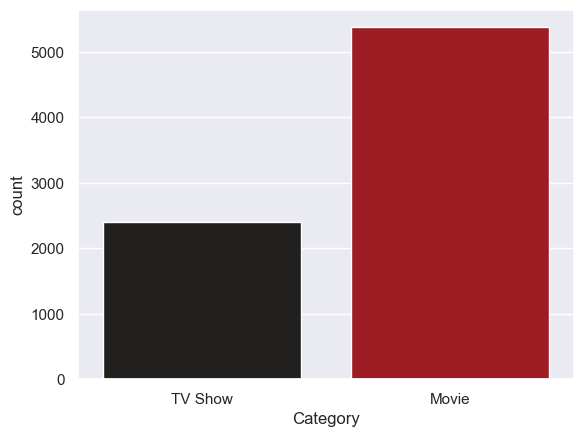

In [307]:
# visualize number who see movies or TV_show
x=v.groupby(['Category'])['Category'].count()
y=len(v)
r=((x/y)).round(2)
sns.set(style="darkgrid")
ax = sns.countplot(x="Category", data=v, palette=sns.blend_palette(['#221f1f', '#b20710'],2))
# we show that who watching movie greater than who watching tv_show

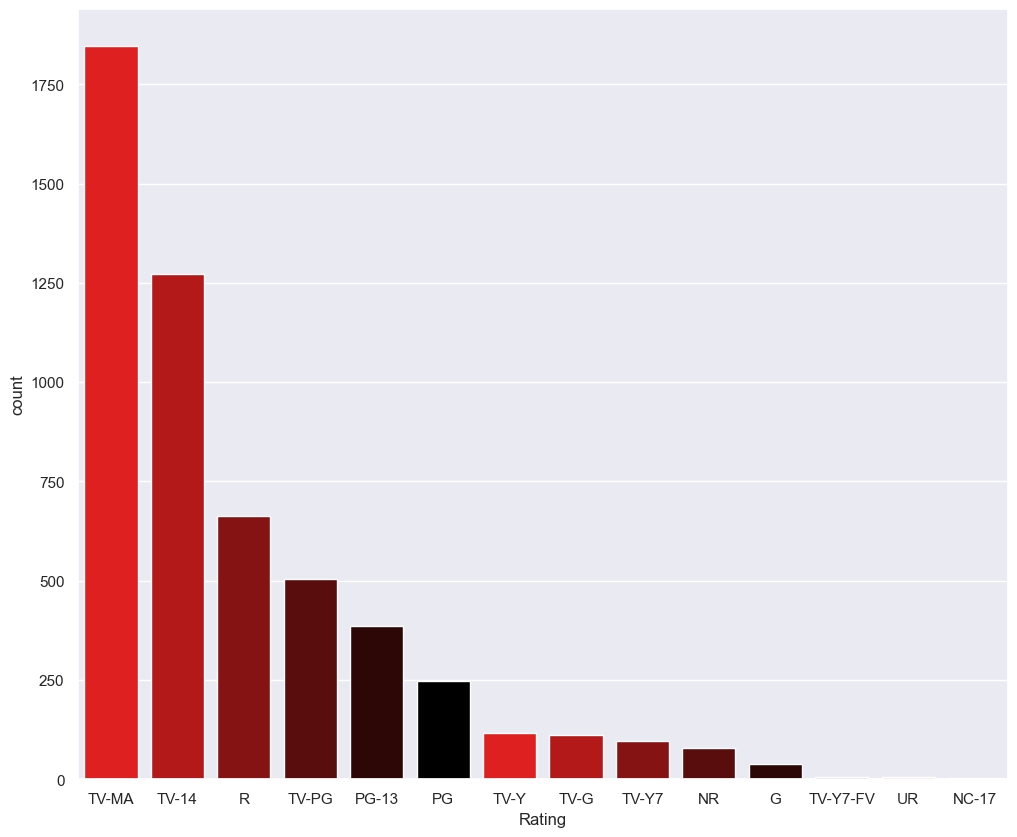

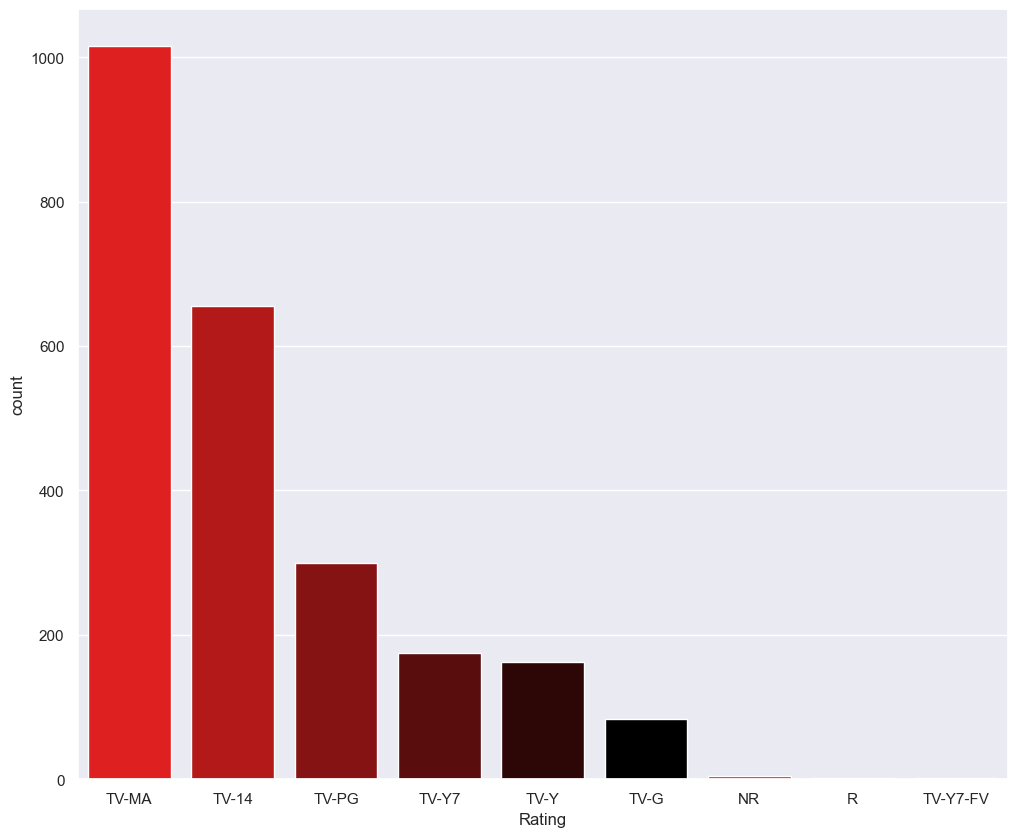

In [254]:
# visualize rating with movie and tv_show
n_movies=v[v['Category']=='Movie']
n_shows=v[v['Category']=='TV Show']
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=n_movies, palette=sns.blend_palette(['red', 'black']), order=n_movies['Rating'].value_counts().index[0:15])
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=n_shows, palette=sns.blend_palette(['red', 'black']), order=n_shows['Rating'].value_counts().index[0:15])

In [255]:
# Helper column for various plots
v['count'] = 1

# retrieve the first country
v['first_country'] = v['Country'].apply(lambda x: x.split(",")[0])
v['first_country'].head()

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

v['target_ages'] = v['Rating'].replace(ratings_ages)
v['target_ages'].unique()

# Genre

v['genre'] = v['Type'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

v['first_country'].replace('United States', 'USA', inplace=True)
v['first_country'].replace('United Kingdom', 'UK',inplace=True)
v['first_country'].replace('South Korea', 'S. Korea',inplace=True)


C:\Users\elham\AppData\Local\Temp\ipykernel_10820\191227539.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



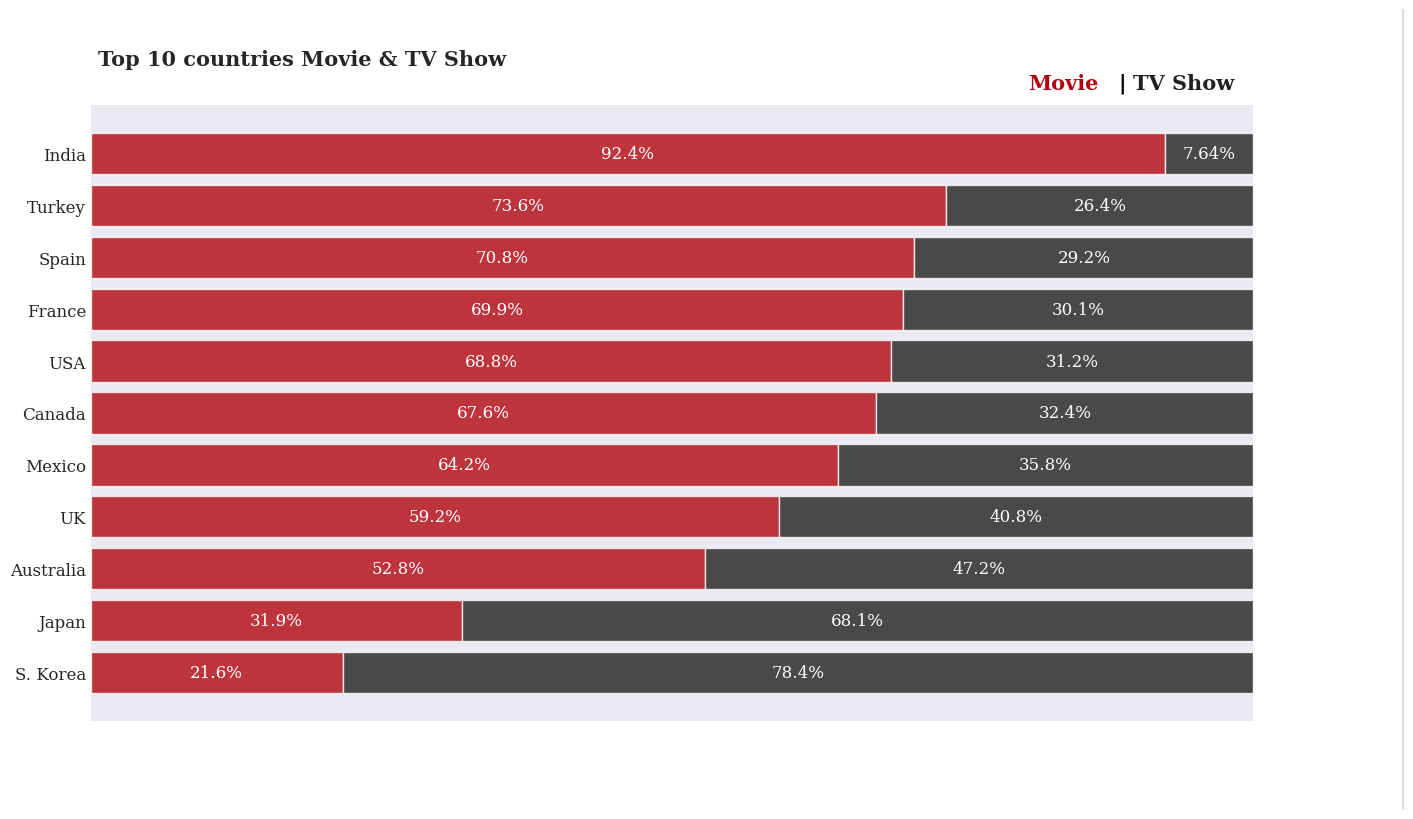

In [256]:
country_order = v['first_country'].value_counts()[:11].index
data_q2q3 = v[['Category', 'first_country']].groupby('first_country')['Category'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)
# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')     

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()
# when we visualize the 10 top countries watch movie or tv_show we found 
# INDIA the greatest in watching movie 
# and S.KOREA the greatest in watching tv_show

In [257]:
n_IndianMovies=n_movies[n_movies['Country']=='India']    
    
col = "Director"
categories = ", ".join(n_IndianMovies[col].fillna("")).split(", ")
counter_list = collections.Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#b20710"))

Trace = [trace1]
layout = go.Layout(title="Movie Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()
# we found 2 directors are popular in INDIA (RAUL CAMPOS,JAN SUTER)

In [258]:
n_USAMovies=n_movies[n_movies['Country']=='United States']    
    
col = "Director"
categories = ", ".join(n_USAMovies[col].fillna("")).split(", ")
counter_list = collections.Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#221f1f"))

Trace = [trace1]
layout = go.Layout(title="Movie Directors from USA with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()
# we also found 2 directors are popular in USA (RAUL CAMPOS,JAN SUTER)

In [259]:
# this code creates two scatter plots to visualize the counts of TV shows and movies added on Netflix over the years, and displays them using Plotly.
col = "year_added"

vc1 = n_shows[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = n_movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
Trace= [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()
# when we visualize year with movie and tv_show we found that the movie increase in 2019 and decrease after that
# and tv_show was increase in 2020 and decrease after that

In [308]:
# this code creates two scatter plots to visualize the counts of TV shows and movies added on Netflix by the month, and displays them using Plotly.
col = "month_added"

vc1 = n_shows[col].value_counts().reset_index() #n_shows['year_added'].value_counts.reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = n_movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
#trace1 = go.scatter(x=vc1['year_added'],y = vc1['count'])
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
Trace = [trace1, trace2]
layout = go.Layout(title="Content added by monyh", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(Trace, layout=layout)
fig.show()

# Prepare data for build model

In [309]:

#Extract the column values
column_values = data['Rating'].values

#Initialize the LabelEncoder
label_encoder = LabelEncoder()

#Fit and transform the column values
encoded_values = label_encoder.fit_transform(column_values)

#Update the dataframe with the encoded values
data['Rating'] = encoded_values


In [310]:
X = data.drop(["Rating"],axis =1)
y = data["Rating"]

# split Data (train ,test)

In [320]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('X_train:\n', X_train.head(), '\n', X_train.shape, '\n')
print('X_test:\n', X_test.head(), '\n', X_test.shape, '\n')
print('y_train:\n', y_train.head(), '\n', y_train.shape, '\n')
print('y_test:\n', y_test.head(), '\n', y_test.shape, '\n')

X_train:
       Category_0  Category_1  Type_1  Type_2  Type_3  Type_4  Type_5  Type_6  \
3521           0           1       0       0       0       0       0       0   
5859           0           1       0       0       0       0       0       0   
2578           0           1       0       0       0       0       0       0   
3955           0           1       0       0       0       0       0       0   
6556           1           0       0       0       0       0       0       0   

      Type_7  Type_8  ...  Year_popularity_0.5954545454545455  \
3521       0       0  ...                                   0   
5859       0       0  ...                                   0   
2578       0       0  ...                                   0   
3955       0       0  ...                                   0   
6556       0       0  ...                                   0   

      Year_popularity_0.6153846153846154  Year_popularity_0.648  \
3521                                   0           

# Models

# Decision Tree  model

In [321]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.968529222864483

#  Evaluation metrics 

precision

recall

f1

In [313]:

# Use micro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='micro')
recall = recall_score(y_pred,y_test, average='micro')
f1 = f1_score(y_pred,y_test, average='micro')

# Use macro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='macro')
recall = recall_score(y_pred,y_test, average='macro')
f1 = f1_score(y_pred,y_test, average='macro')

# Use weighted-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test, average='weighted')

# Print the metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Precision: 0.9655099793171161
Recall: 0.9653179190751445
F1 Score: 0.965348220546269


# Random Forest model

In [314]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_pred,y_test)

0.968529222864483

*Evaluation metrics


In [315]:

# Use micro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='micro')
recall = recall_score(y_pred,y_test, average='micro')
f1 = f1_score(y_pred,y_test, average='micro')

# Use macro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='macro')
recall = recall_score(y_pred,y_test, average='macro')
f1 = f1_score(y_pred,y_test, average='macro')

# Use weighted-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test, average='weighted')

# Print the metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Precision: 0.968735221065279
Recall: 0.968529222864483
F1 Score: 0.9685628944979213


# Support Vector Classification model (SVC)

In [316]:
svc = SVC()

# Fit the classifier on the training data
svc.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = svc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9653179190751445

In [317]:

# Use micro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='micro')
recall = recall_score(y_pred,y_test, average='micro')
f1 = f1_score(y_pred,y_test, average='micro')

# Use macro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='macro')
recall = recall_score(y_pred,y_test, average='macro')
f1 = f1_score(y_pred,y_test, average='macro')

# Use weighted-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test, average='weighted')

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9653179190751445
Precision: 0.966452433901611
Recall: 0.9653179190751445
F1 Score: 0.9653842593325681


# Logistic Regression model

In [318]:

lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9678869621066153


In [319]:

# Use micro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='micro')
recall = recall_score(y_pred,y_test, average='micro')
f1 = f1_score(y_pred,y_test, average='micro')

# Use macro-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='macro')
recall = recall_score(y_pred,y_test, average='macro')
f1 = f1_score(y_pred,y_test, average='macro')

# Use weighted-average for precision, recall, and F1 score
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test, average='weighted')

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9678869621066153
Precision: 0.9682426243833056
Recall: 0.9678869621066153
F1 Score: 0.9678960141555727


# Evaluate the models using cross-validation

In [266]:
# Evaluate the models using cross-validation
scores_dtc = cross_val_score(dtc, X, y, cv=5)
scores_rfc = cross_val_score(rfc, X, y, cv=5)
scores_svc = cross_val_score(svc, X, y, cv=5)
scores_lr = cross_val_score(lr, X, y, cv=5)

# Print the mean cross-validation scores for each model
print("Decision Tree:", scores_dtc.mean())
print("Random Forest:", scores_rfc.mean())
print("SVC:", scores_svc.mean())
print("Logistic Regression:", scores_lr.mean())

Decision Tree: 0.9636344198932427
Random Forest: 0.9681325566766226
SVC: 0.9695459431079148
Logistic Regression: 0.9700602470309887


# the best model

In [267]:

# Choose the best model based on their mean cross-validation score
best_model = max([scores_dtc.mean(), scores_rfc.mean(), scores_svc.mean(), scores_lr.mean()])
if best_model == scores_dtc.mean():
    best_model_name = "Decision Tree"
    best_model_instance = dtc
elif best_model == scores_rfc.mean():
    best_model_name = "Random Forest"
    best_model_instance = rfc
elif best_model == scores_svc.mean():
    best_model_name = "SVC"
    best_model_instance = svc
else:
    best_model_name = "Logistic Regression"
    best_model_instance = lr
    
print("The best model is:", best_model_name)

# Fit the best model on the entire dataset and print the accuracy score
best_model_instance.fit(X, y)
accuracy = best_model_instance.score(X, y)
print("The accuracy score of the best model on the entire dataset is:", accuracy)


The best model is: Logistic Regression
The accuracy score of the best model on the entire dataset is: 0.9841942945258288


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

